## Leitura de uma base de imagens na forma
* base/
    * treino/
        * classes/...
            * imagens/...
    * teste/
        * classes/...
            * imagens/...

#### Será salva no formato
[matriz, numero da classe, nome da pasta onde a imagem esta salva (nome da classe)]

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle
import os
import pathlib


def detect_faces(img):
    
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces_detected = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)

    if len(faces_detected) > 0:
        (x, y, w, h) = faces_detected[0]
        print(len(faces_detected))

        #img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)

        p=3 #padding, margem
        img = img[y-p+1:y+h+p, x-p+1:x+w+p]

        #img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        #plt.imshow(img_rgb, cmap='gray')
        #plt.show()
    else:
        print("Nenhuma face detectada")
    return img

In [35]:
#DATADIR = "../bases/dados/imagens/mnist/train"
DATADIR = "../../../_DATA_/image/face"

DATADIR = pathlib.Path(DATADIR)

#IMG_SIZE = 28#'original'#Tamanho mxm e original
IMG_SIZE = 50#'original'#Tamanho mxm e original

formato = 'jpg'

#nome_saida = "mnist-train-2"
nome_saida = "faces-crop"

#local_saida = "../bases/pickle/imagens/mnist/"
local_saida = "../../../_DATA_/image/pickle/"

In [36]:
CATEGORIES = os.listdir(DATADIR)
CATEGORIES.sort()

try:
    CATEGORIES.remove('.ipynb_checkpoints')
except:
    pass
print(CATEGORIES)

['celso', 'faustao', 'ratinho']


In [37]:
SIZE_OF_DATASET = len(list(DATADIR.glob('*/*.'+formato)))

print("Number of training images: ",SIZE_OF_DATASET)

Number of training images:  60


In [38]:
def prep_data(DATA_DIR, CATEGORIES, IMG_SIZE):
    data = []
    for category in CATEGORIES:
        i=0
        path = os.path.join(DATA_DIR,category)
        class_num = CATEGORIES.index(category)#############

        for img in tqdm(os.listdir(path)):

#            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
            img_array = cv2.imread(os.path.join(path,img) ,cv2.cv2.IMREAD_COLOR)
            
            img_array = detect_faces(img_array)
            
            #******************APLICAR PRE-PROCESSAMENTO***************

            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)


            if IMG_SIZE == 'original':
                new_array = img_array
            else:
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))


            data.append([new_array, class_num, category])
            #i=i+1
            #if i >= 100:
            #    break

        plt.figure(figsize=(1,1))
        plt.imshow(new_array, cmap='gray')
        plt.show()
    return data

 10%|█         | 2/20 [00:00<00:01, 12.06it/s]

2
1
1


 35%|███▌      | 7/20 [00:00<00:00, 17.16it/s]

1
1
1
1
1
1


 65%|██████▌   | 13/20 [00:00<00:00, 20.81it/s]

1
1
3
1
1


 80%|████████  | 16/20 [00:00<00:00, 20.58it/s]

1
1
1
1
1


100%|██████████| 20/20 [00:01<00:00, 19.06it/s]

1


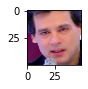

 10%|█         | 2/20 [00:00<00:01, 12.69it/s]

3
2


 30%|███       | 6/20 [00:00<00:00, 24.36it/s]

1
1
1
1
2


 45%|████▌     | 9/20 [00:00<00:00, 17.74it/s]

1
1
1
1


 60%|██████    | 12/20 [00:00<00:00, 14.19it/s]

6
2


 70%|███████   | 14/20 [00:00<00:00, 14.50it/s]

1
1


 90%|█████████ | 18/20 [00:01<00:00, 12.92it/s]

1
2
5
1


100%|██████████| 20/20 [00:01<00:00, 14.41it/s]

1


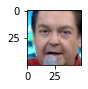

 15%|█▌        | 3/20 [00:00<00:00, 22.92it/s]

1
1
1
1


 30%|███       | 6/20 [00:00<00:00, 21.66it/s]

1
1
1
1
1
1


 65%|██████▌   | 13/20 [00:00<00:00, 18.93it/s]

1
1
1
1
1


 80%|████████  | 16/20 [00:00<00:00, 20.81it/s]

1
2
1


100%|██████████| 20/20 [00:00<00:00, 21.23it/s]

1
1


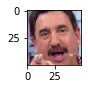

Number of images:  60


In [39]:
data = prep_data(DATADIR, CATEGORIES, IMG_SIZE)
print('Number of images: ',len(data))

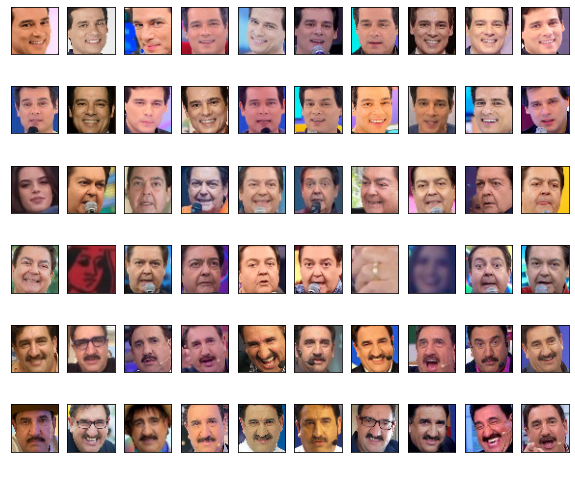

In [40]:
plt.figure(figsize=(10,10))
m = 70
if( len(data) < 70 ):
    m = len(data)
for i in range(m):
    plt.subplot(7,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i][0], cmap='gray')
    plt.xlabel("{}\n({})".format( data[i][1] , data[i][2] ), color='white')    
plt.show()

In [41]:
def save_data(save_name, data):
    pickle_out = open(save_name+"-pickle.pickle","wb")
    print('Arquivo gravado como: '+save_name+"-pickle.pickle")
    pickle.dump(data, pickle_out)
    pickle_out.close()

In [42]:
save_data(local_saida+nome_saida, data)

Arquivo gravado como: ../../../_DATA_/image/pickle/faces-crop-pickle.pickle
